In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wine-clustering.csv')

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

In [5]:
scaler = StandardScaler()
data = scaler.fit_transform(df)

In [7]:
pca = PCA()
pca.fit_transform(data)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

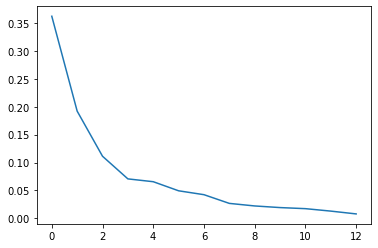

In [9]:
plt.plot(pca.explained_variance_ratio_)

In [13]:
pca = PCA(n_components=4)
data = pca.fit_transform(data)
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

In [15]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(data)
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

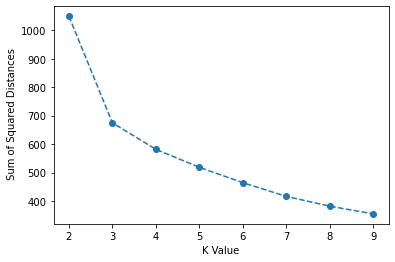

In [16]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [17]:
model = KMeans(n_clusters=3)
cluster_labels = model.fit_predict(data)

In [18]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [22]:
data = pd.DataFrame(data, columns=['pc1', 'pc2', 'pc3', 'pc4'])

In [23]:
data['cluster'] = cluster_labels

In [24]:
data.head()

,pc1,pc2,pc3,pc4,cluster
0,3.316751,-1.443463,-0.165739,-0.215631,1
1,2.209465,0.333393,-2.026457,-0.291358,1
2,2.516740,-1.031151,0.982819,0.724902,1
3,3.757066,-2.756372,-0.176192,0.567983,1
4,1.008908,-0.869831,2.026688,-0.409766,1


<AxesSubplot:>

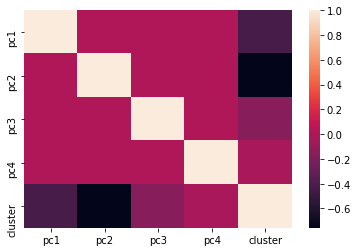

In [25]:
sns.heatmap(data.corr())

In [32]:
x = data.values

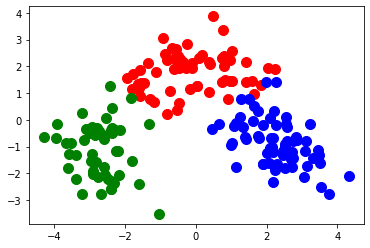

In [33]:
plt.scatter(x[cluster_labels==0,0], x[cluster_labels==0,1],s = 100, c='red',label ='Cluster1')
plt.scatter(x[cluster_labels==1,0], x[cluster_labels==1,1],s = 100, c='blue',label ='Cluster2')
plt.scatter(x[cluster_labels==2,0], x[cluster_labels==2,1],s = 100, c='green',label ='Cluster3')

plt.show()

In [34]:
import scipy.cluster.hierarchy as sch

In [36]:
x = data.iloc[:, :4].values

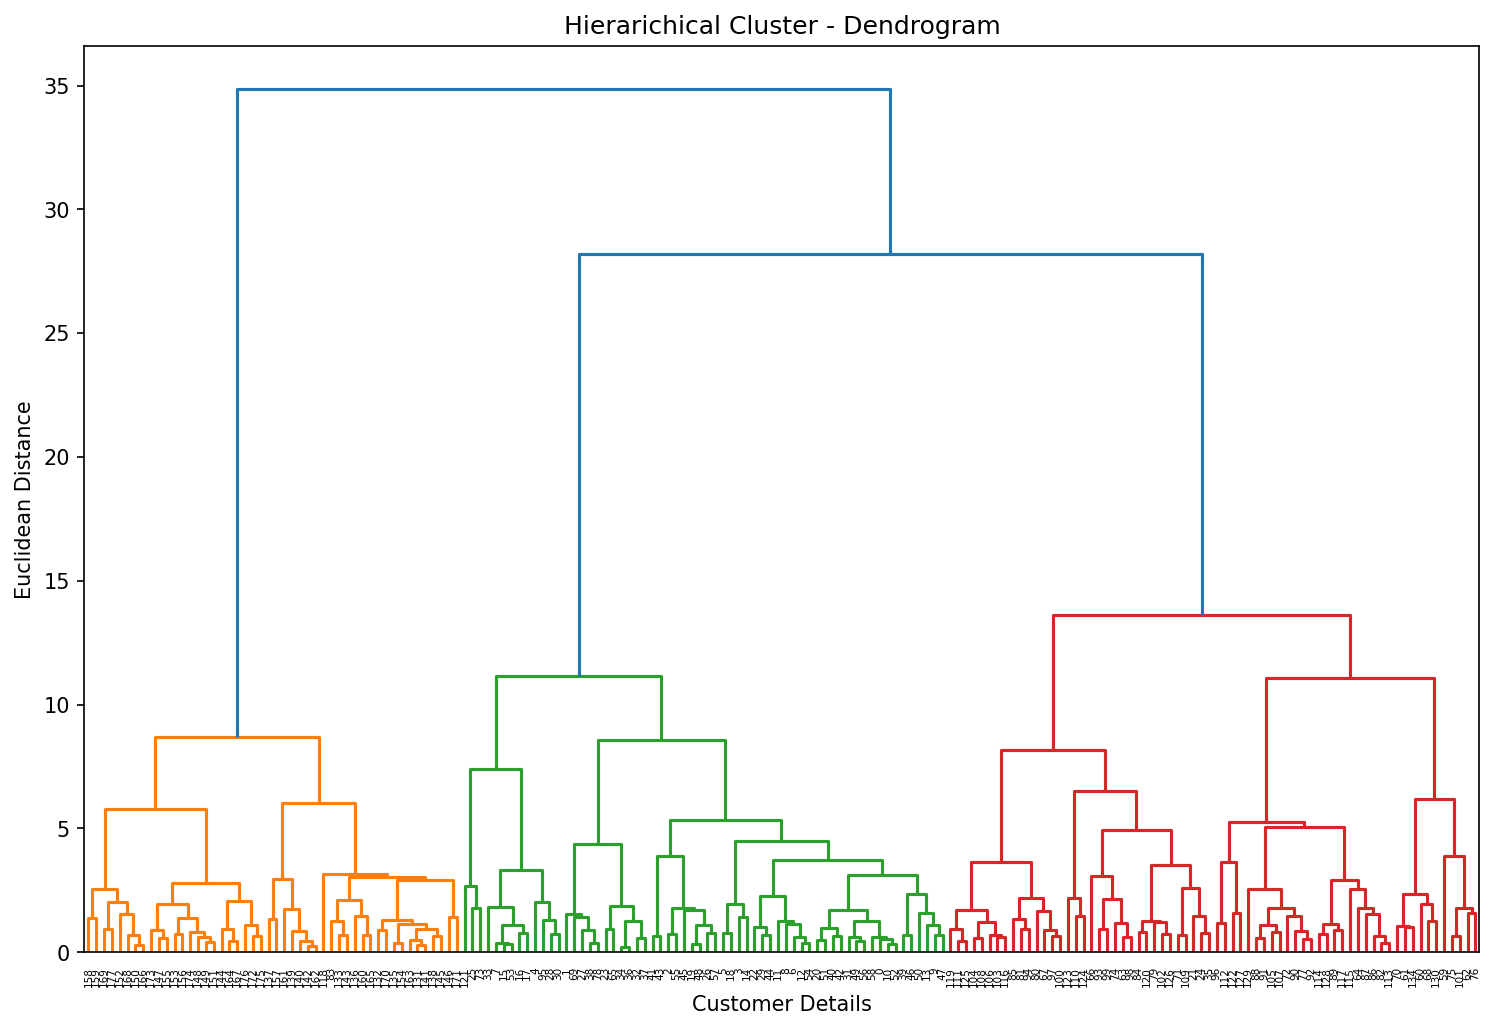

In [39]:
plt.figure(figsize=(12, 8), dpi=150)
dendrogram = sch.dendrogram(sch.linkage(x, method ='ward'))
plt.title("Hierarichical Cluster - Dendrogram")
plt.xlabel("Customer Details")
plt.ylabel("Euclidean Distance")
plt.xticks(rotation=90)
plt.show()

In [40]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean')  
cluster.fit_predict(x)  

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

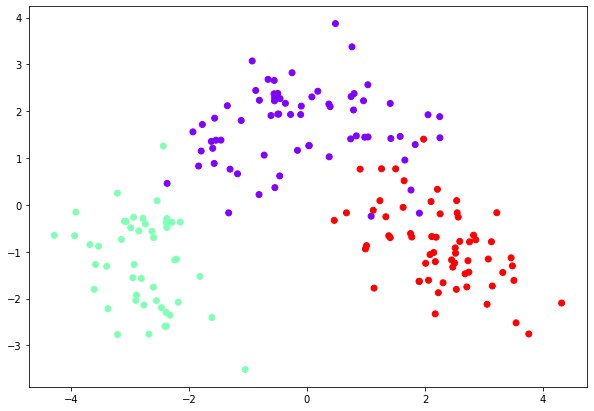

In [41]:
plt.figure(figsize=(10, 7))  
plt.scatter(x[:,0], x[:,1], c=cluster.labels_, cmap='rainbow')  

In [47]:
df['cluster'] = cluster.labels_

In [48]:
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
cluster,,,,,,,,,,,,,
0,12.3,1.9,2.3,20.1,91.9,2.3,2.0,0.4,1.6,3.1,1.0,2.8,518.8
1,13.2,3.4,2.4,21.5,98.4,1.7,0.8,0.5,1.2,7.4,0.7,1.7,621.7
2,13.6,1.9,2.4,17.3,109.4,2.8,3.0,0.3,2.0,5.4,1.1,3.1,1094.0
